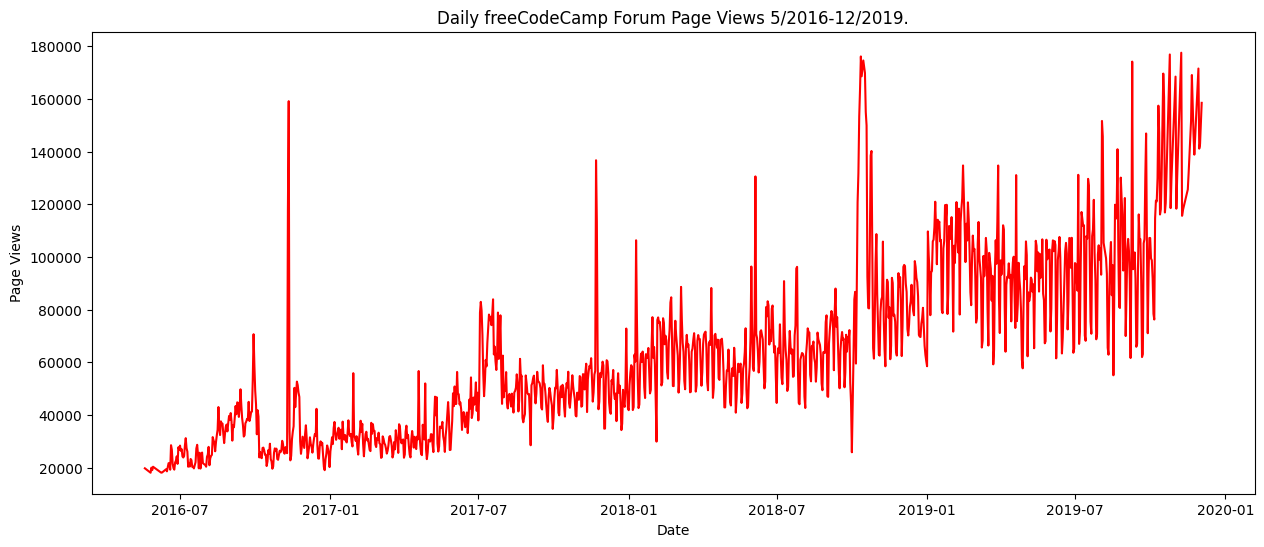

<Figure size 1000x700 with 0 Axes>

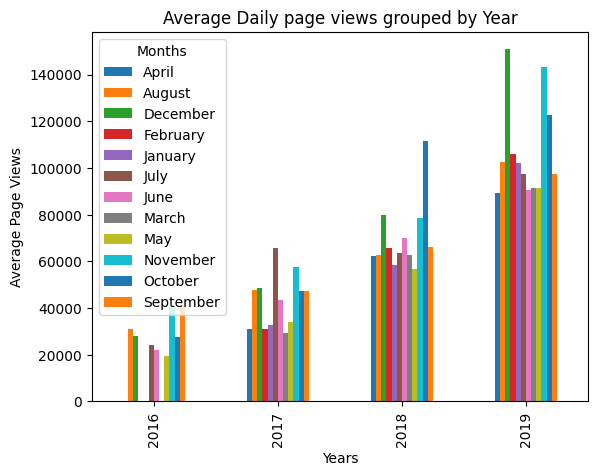

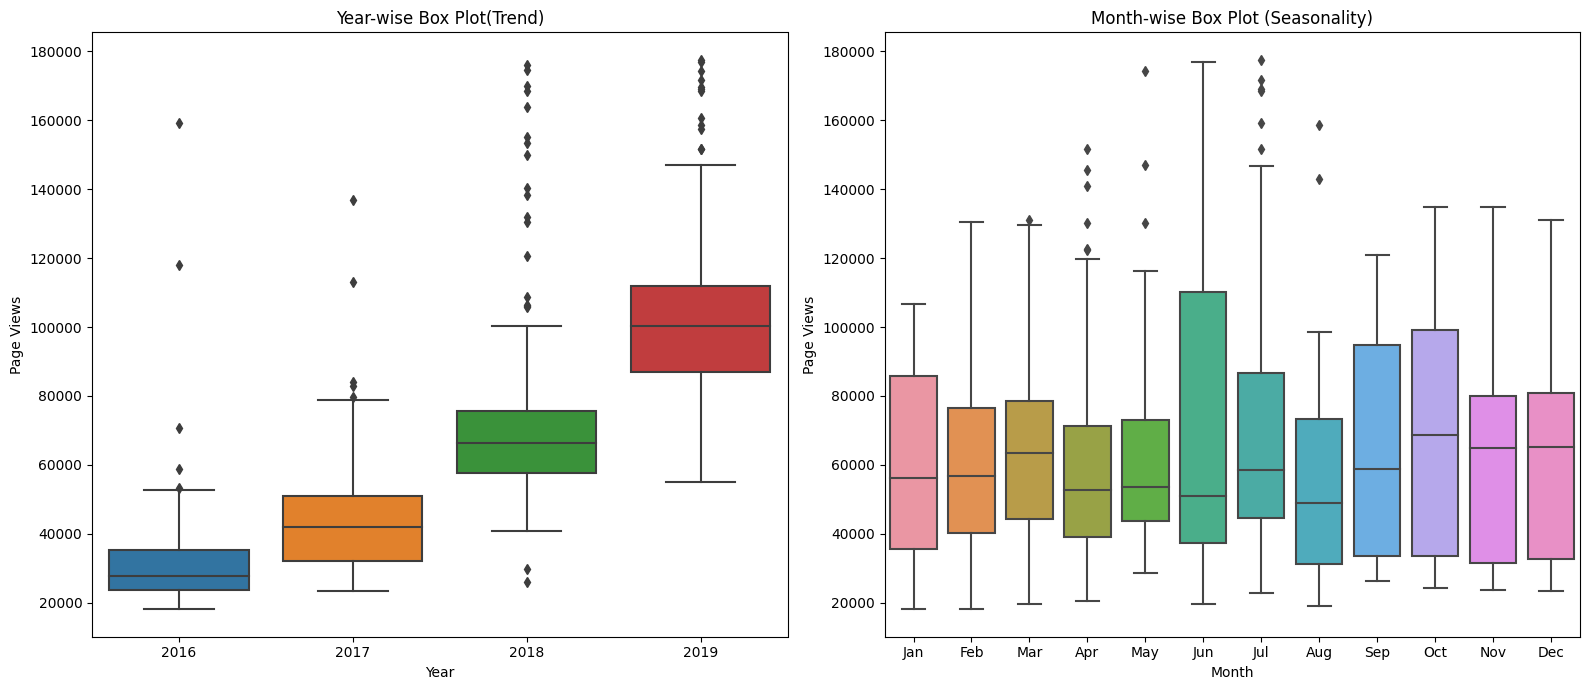

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Reading data
df=pd.read_csv('fcc-forum-pageviews.csv',parse_dates=True,index_col='date')

#Calculating top 2.5% and bottom 2.5% of views
top_page_views=df['value'].quantile(0.975)
bottom_page_views=df['value'].quantile(0.025)

#Filtering out top 2.5% and bottom 2.5% of views
df=df[(df['value']<top_page_views) & (df['value']>bottom_page_views)]

#Plotting line graph with required data
plt.figure(figsize=(15, 6))
plt.plot(df.index,df['value'],color='red',linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019.')
plt.show()

#Required data for bar graph
df['year'] = df.index.year
df['month'] = df.index.strftime('%B')

#Plot for bar
df_bar = df.groupby(['year','month'])['value'].mean().unstack()

#Plotting bar graph for average of each month grouped by years
plt.figure(figsize=(10, 7))
df_bar.plot(kind='bar')
plt.legend(title='Months', labels=df_bar.columns)
plt.title('Average Daily page views grouped by Year')
plt.xlabel('Years')
plt.ylabel('Average Page Views')

#Required data for box plots
df_bar=df.copy()
df_bar['year'] = df.index.year
df_bar['month'] = df.index.strftime('%b')

#Figure size
plt.figure(figsize=(16,7))


#Plotting for year wise
plt.subplot(1,2 ,1)
sns.boxplot(x='year', y='value', data=df_bar)
plt.title("Year-wise Box Plot(Trend)")
plt.xlabel('Year')
plt.ylabel('Page Views')

#Plotting for month wise
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplot(1,2,2)
sns.boxplot(x='month', y='value', data=df_bar)
plt.xticks(range(12), month_order)
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.tight_layout()
plt.show()

